<a href="https://colab.research.google.com/github/Rijan-Joshi/KMC_Note/blob/main/Introduction_to_Tensorflow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
!pip install numpy pandas matplotlib

In [4]:
import numpy as np
x = np.ones(shape=(2,1))
print(x)

[[1.]
 [1.]]


Random Tensors


In [5]:
x = tf.random.normal(shape=(3,1), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[ 0.6861915]
 [-0.6337493]
 [-0.7716298]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape=(3,1), minval= 0, maxval=1)
print(x)

tf.Tensor(
[[0.32131886]
 [0.20487642]
 [0.06692386]], shape=(3, 1), dtype=float32)


Creating Tensorflow variables and assigning a value to it


In [7]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5314273 ],
       [-0.18217736],
       [ 1.9199961 ]], dtype=float32)>


In [8]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>


In [10]:
#Few tensor operation in tensorflow

a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

print(a, b, c, d, e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [11]:
input_var = tf.Variable(initial_value = 3.)
print(input_var)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [13]:
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Backpropagation using GradientTape in Tensorflow watching and manual marking**

---



In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)


tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order derivative or gradient**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


Generating two classes of random points in a 2D plane


In [14]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

print(negative_samples)

[[ 0.62668081  2.37673256]
 [-0.04133415  2.20971399]
 [-0.31982376  2.54679057]
 ...
 [ 1.4791032   3.2053759 ]
 [ 0.7874628   3.27309888]
 [ 1.69840385  3.14165438]]


In [15]:
#Stacking two classes above into an array with shape(2000,2) and generating the corresponding targets
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[ 0.6266808   2.3767326 ]
 [-0.04133415  2.209714  ]
 [-0.31982374  2.5467906 ]
 ...
 [ 4.371709   -0.567242  ]
 [ 2.7363305  -0.824191  ]
 [ 3.6748278  -1.115848  ]]


In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype = "float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


**Plotting the two point classes**

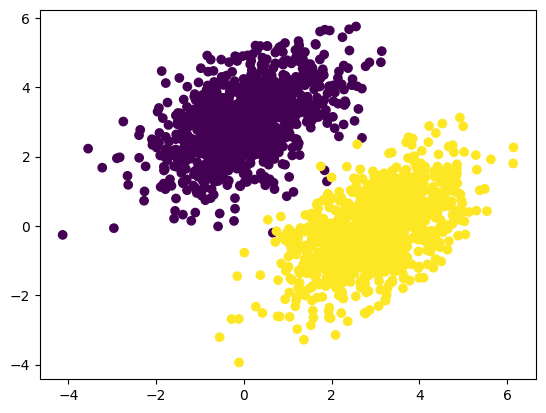

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [18]:
input_dim = 2
output_dim  = 1
W  = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))
print(W, b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.42473316],
       [0.56033146]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**Forward Pass Function**

In [19]:
def model(inputs):
  return tf.matmul(inputs, W) + b

**Loss function using square loss function**

In [20]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

**Training Step Function**

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss



**Batch Training**

In [22]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss at step {step} : {loss:.4f}')

Loss at step 0 : 2.2470
Loss at step 1 : 0.3274
Loss at step 2 : 0.1445
Loss at step 3 : 0.1153
Loss at step 4 : 0.1047
Loss at step 5 : 0.0970
Loss at step 6 : 0.0902
Loss at step 7 : 0.0841
Loss at step 8 : 0.0785
Loss at step 9 : 0.0735
Loss at step 10 : 0.0689
Loss at step 11 : 0.0648
Loss at step 12 : 0.0610
Loss at step 13 : 0.0576
Loss at step 14 : 0.0545
Loss at step 15 : 0.0517
Loss at step 16 : 0.0492
Loss at step 17 : 0.0469
Loss at step 18 : 0.0448
Loss at step 19 : 0.0429
Loss at step 20 : 0.0412
Loss at step 21 : 0.0396
Loss at step 22 : 0.0382
Loss at step 23 : 0.0369
Loss at step 24 : 0.0358
Loss at step 25 : 0.0347
Loss at step 26 : 0.0338
Loss at step 27 : 0.0329
Loss at step 28 : 0.0321
Loss at step 29 : 0.0314
Loss at step 30 : 0.0307
Loss at step 31 : 0.0301
Loss at step 32 : 0.0296
Loss at step 33 : 0.0291
Loss at step 34 : 0.0287
Loss at step 35 : 0.0283
Loss at step 36 : 0.0279
Loss at step 37 : 0.0276
Loss at step 38 : 0.0273
Loss at step 39 : 0.0270


**Plotting the linear model**

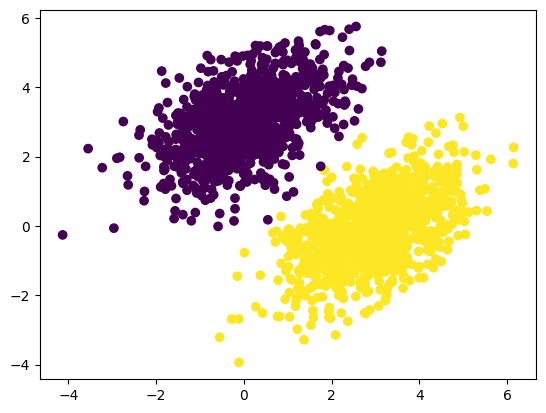

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

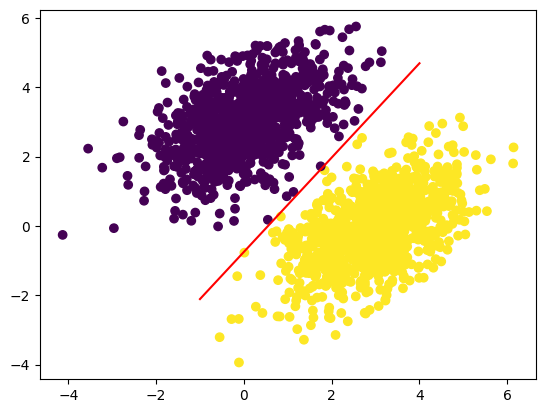

In [24]:
x = np.linspace(-1, 4, 10)
y = -W[0]/ W[1] * x  + (0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:,1], c = predictions[:, 0] > 0.5)

Anatomy of Neural Network

In [27]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation= None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape= (input_dim, self.units), initializer = 'random_normal')
    self.b = self.add_weight(shape=(self.units), initializer = 'zeros')

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [28]:
my_dense = SimpleDense(32, tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


(2, 32)


In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = keras.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dense(32)
])

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate = 0.1),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

n = int(0.3* len(inputs))
validation_inputs = shuffled_inputs[:n]
validation_targets = shuffled_targets[:n]
training_inputs = shuffled_inputs[n:]
training_targets = shuffled_targets[n:]

model.fit(
    training_inputs,
    training_targets,
    epochs = 5,
    batch_size = 16,
    validation_data  = (validation_inputs, validation_targets)
)

loss_and_metrics = model.evaluate(validation_inputs, validation_targets, batch_size = 128)

prediction = model.predict(validation_inputs, batch_size = 128)
print(prediction[:10])

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.2217 - binary_accuracy: 0.9171 - val_loss: 0.0239 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0764 - binary_accuracy: 0.9471 - val_loss: 0.0794 - val_binary_accuracy: 0.9667
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0734 - binary_accuracy: 0.9607 - val_loss: 0.0391 - val_binary_accuracy: 0.9967
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0767 - binary_accuracy: 0.9507 - val_loss: 0.0634 - val_binary_accuracy: 0.9817
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
[[1.2487864]
 [1.1122746]
 [0.9212285]
 [1.2731192]
 [1.1770377]
 [1.068923 ]
 [1.2464854]
 [1.0841594]
 [0.9946685]
 [1.0953343]]
